<img src="http://akhavanpour.ir/notebook/images/srttu.gif" alt="SRTTU" style="width: 150px;"/>

[![Azure Notebooks](https://notebooks.azure.com/launch.png)](https://notebooks.azure.com/import/gh/Alireza-Akhavan/class.vision)


# Book Recommendation System

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سیستم توصیه گر کتاب</div>

<div style="direction:rtl;text-align:right;font-family:Tahoma">
کدها برگرفته از مستندات بلاگ :</div>

[https://towardsdatascience.com/building-a-book-recommendation-system-using-keras-1fba34180699
](https://towardsdatascience.com/building-a-book-recommendation-system-using-keras-1fba34180699)



<div style="direction:rtl;text-align:right;font-family:Tahoma">
و کدهای موجود در مخزن کد:</div>

[https://github.com/TannerGilbert/Articles](https://github.com/TannerGilbert/Articles)


<div style="direction:rtl;text-align:right;font-family:Tahoma">
است<br>
</div>


# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">مجموعه داده</div>

<div style="direction:rtl;text-align:right;font-family:Tahoma">
کدها برگرفته از مستندات بلاگ :</div>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">
مجموعه داده‌ی استفاده شده در این نوت بوک   goodbooks-10k سایت Kaggle است.
</div>

[https://www.kaggle.com/zygmunt/goodbooks-10k](https://www.kaggle.com/zygmunt/goodbooks-10k)


<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">
ویژگی های موجود در دیتاست:</div>

        -book_id
        -user_id
        -rating

In [1]:
import pandas as pd
import numpy as np

from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from tensorflow.keras.models import Model


In [2]:
dataset = pd.read_csv('https://github.com/Alireza-Akhavan/datasets_and_models/raw/main/ratings.csv')

In [3]:
dataset.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [4]:
dataset.shape

(981756, 3)

In [5]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, random_state=42)

In [6]:
train.head()

,book_id,user_id,rating
341848,3423,4608,2
964349,9811,36373,5
645459,6485,2957,4
74960,750,42400,3
358670,3591,36886,5


In [7]:
test.head()

,book_id,user_id,rating
646451,6495,19643,5
614851,6175,8563,4
974393,9920,52110,3
21471,215,33864,5
272540,2728,16587,3


In [8]:
n_users = len(dataset.user_id.unique())
n_users

53424

In [9]:
n_books = len(dataset.book_id.unique())
n_books

10000

<div style="direction:rtl;text-align:right;font-family:Tahoma">
مدلی که خواهیم داشت از اجزای اصلی زیر تشکیل خواهد شد</div>

    -Input: Input for both books and users
    -Embedding Layers: Embeddings for books and users
    -Dot: combines embeddings using a dot product

In [10]:
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_books+1, 5, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)

user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

prod = Dot(name="Dot-Product", axes=1)([book_vec, user_vec])
model = Model([user_input, book_input], prod)
model.compile('adam', 'mean_squared_error')

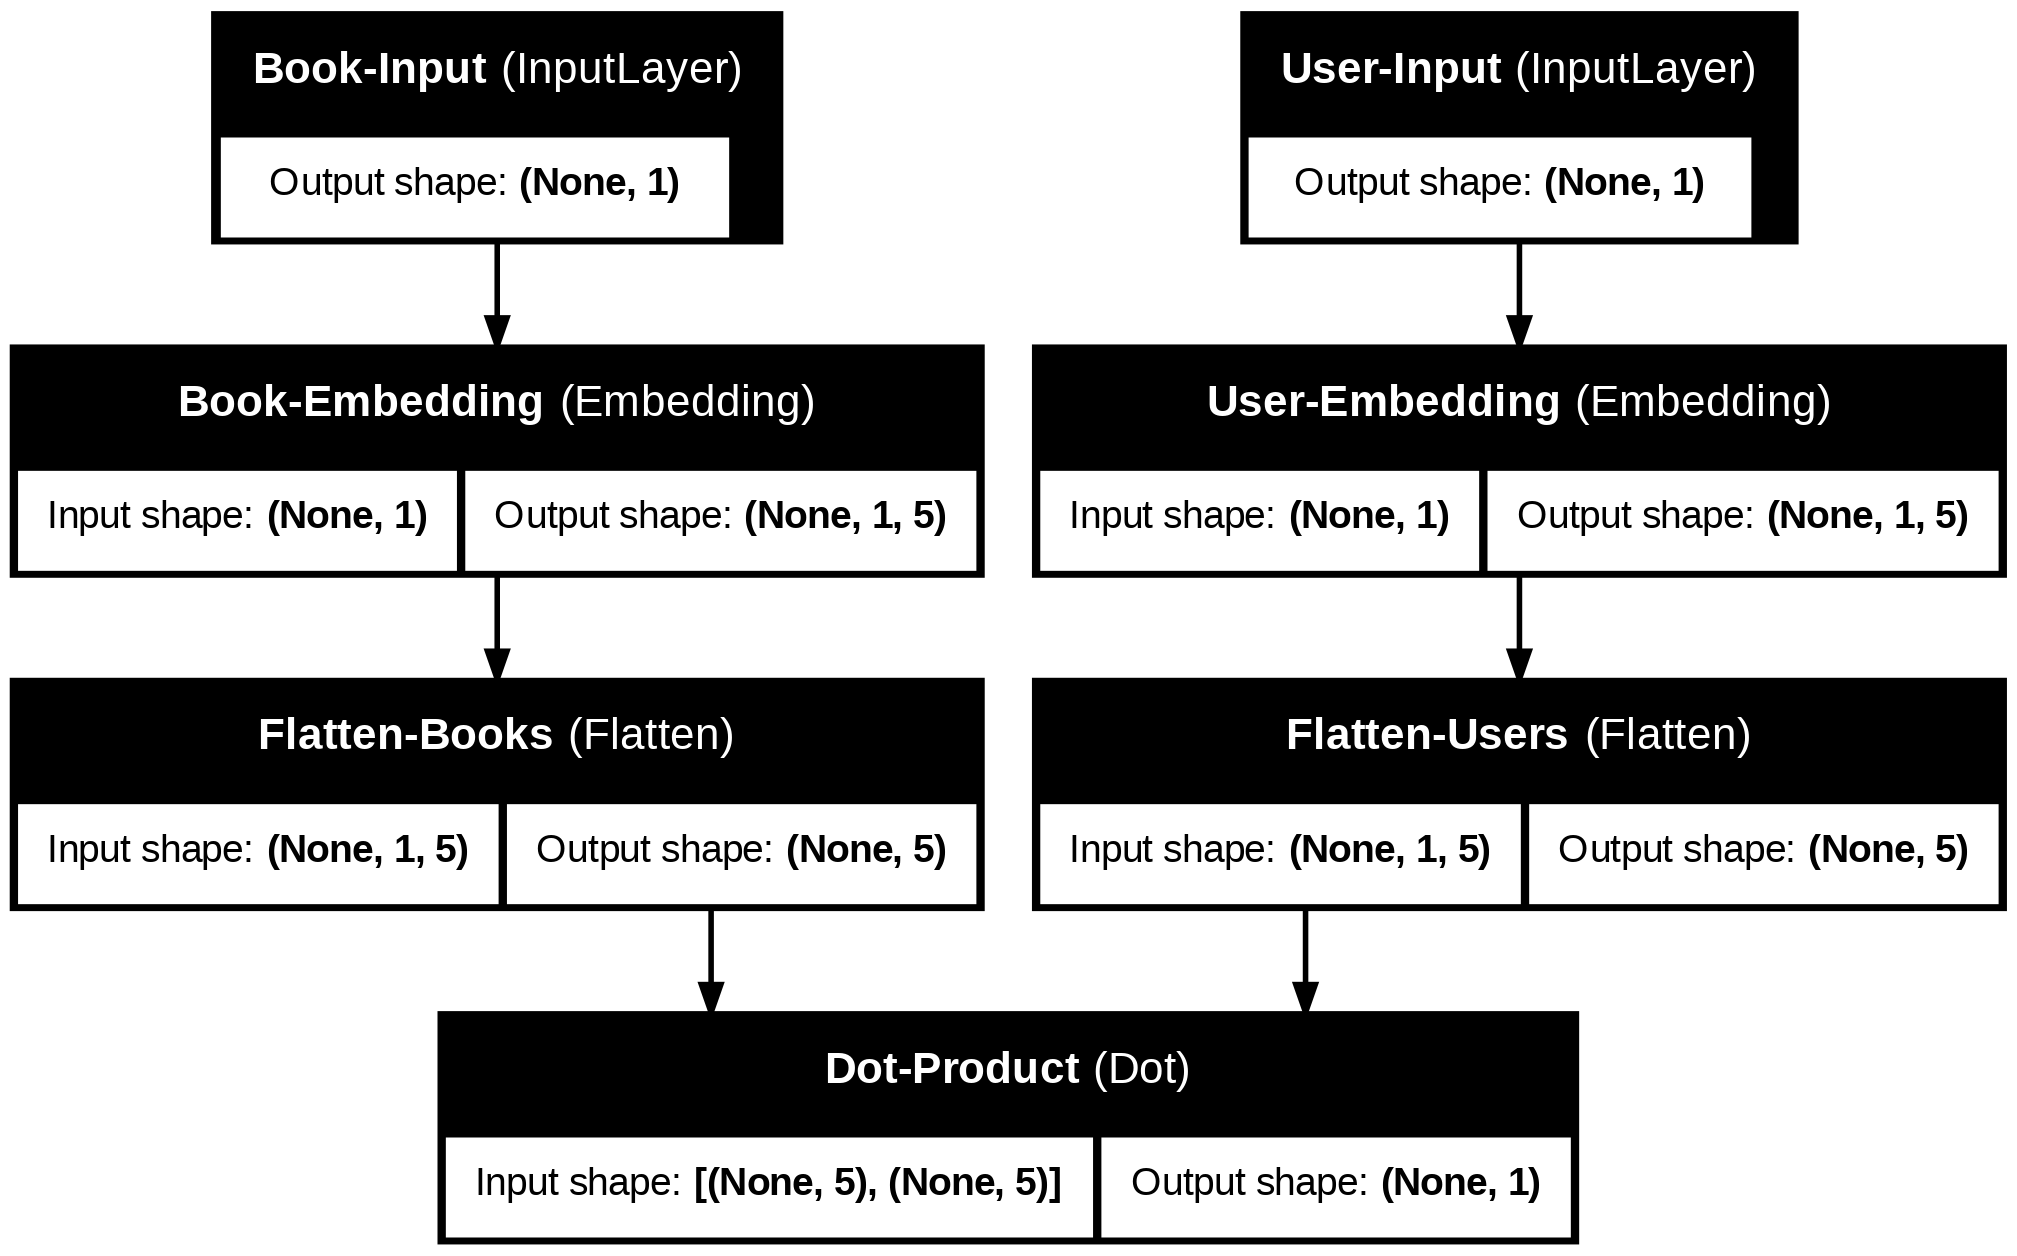

In [15]:
from tensorflow import keras
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [16]:
model.evaluate([test.user_id, test.book_id], test.rating)

6136/6136 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 15.8461


15.828313827514648

In [17]:
predictions = model.predict([test.user_id.head(10), test.book_id.head(10)])

for i in range(0,10):
   print(predictions[i], test.rating.iloc[i])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
[-0.00013578] 5
[0.00252525] 4
[-0.0040984] 3
[-0.00040131] 5
[0.00298493] 3
[-0.00079865] 3
[-0.00010611] 3
[0.00114365] 4
[0.00345364] 3
[-0.00024131] 5


Epoch 1/10
12272/12272 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - loss: 15.5229
Epoch 2/10
12272/12272 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - loss: 7.4060
Epoch 3/10
12272/12272 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 2.3315
Epoch 4/10
12272/12272 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 1.3573
Epoch 5/10
12272/12272 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 1.0258
Epoch 6/10
12272/12272 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 0.8678
Epoch 7/10
12272/12272 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 0.7811
Epoch 8/10
12272/12272 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.7250
Epoch 9/10
12272/12272 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.6900
Epoch 10/10
12272/12272 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 0.6661


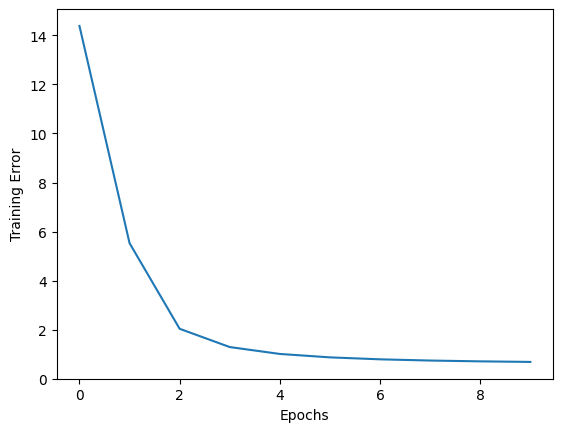

In [18]:
from keras.models import load_model
import matplotlib.pyplot as plt
import os

if os.path.exists('regression_model.keras'):
    model = load_model('regression_model.keras')
else:
    history = model.fit([train.user_id, train.book_id], train.rating, epochs=10,batch_size=64, verbose=1)
    model.save('regression_model.keras')
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

In [19]:
model.evaluate([test.user_id, test.book_id], test.rating)

6136/6136 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.9147


0.9121113419532776

In [20]:
predictions = model.predict([test.user_id.head(10), test.book_id.head(10)])

[print(predictions[i], test.rating.iloc[i]) for i in range(0,10)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[4.889169] 5
[3.5206146] 4
[3.9250107] 3
[3.877754] 5
[3.5594916] 3
[4.135415] 3
[3.4910967] 3
[4.729618] 4
[4.1788] 3
[4.377852] 5


[None, None, None, None, None, None, None, None, None, None]